<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/exer1_funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Criar um criador aleatório de padrões de quadrado, circulo e triângulo.


Esses códigos funcionam, só a parte 1 está completa e funcional.

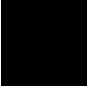

In [5]:
#gerador de quadrados com dimensões aleatórias
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import cv2 as cv
amostras = 100

largura = random.randint(0,amostras)
altura = largura
tamanho = altura * largura
f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  lado = random.randint(0, altura)
  x_min = random.randint(0, largura - lado) 
  y_min = random.randint(0, altura - lado) 
  cv2.rectangle(img,(x_min, y_min),(x_min+lado,y_min+lado),(0,0,0),-1)
  #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)
  
  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)

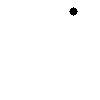

In [6]:
#gerador de círculos com dimensões aleatórias
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import cv2 as cv
amostras = 100

xcentro = random.randint(1, amostras-1) 
ycentro = random.randint(1, amostras-1) 
raio=random.randint(1,(amostras/2))

altura = amostras
largura = amostras

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  
while (raio >= (amostras-xcentro) or raio >= (amostras-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
  raio=random.randint(1,(amostras/2))
else:
  cv.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
  #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)


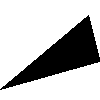

In [7]:
#gerado de triângulos com dimensões aleatórias
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import cv2 as cv
amostras = 100

xe=random.randint(0, amostras)
ye=random.randint(0, amostras)
xp=random.randint(0, amostras)
yp=random.randint(0, amostras)
xd=random.randint(0, amostras)
yd=random.randint(0, amostras)

altura = amostras
largura = amostras

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  
while (yp >= ye or yp >= yd or xd <= xe):
  xe=random.randint(0, amostras)
  ye=random.randint(0, amostras)
  xp=random.randint(0, amostras)
  yp=random.randint(0, amostras)
  xd=random.randint(0, amostras)
  yd=random.randint(0, amostras)

else:
  #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
  pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)

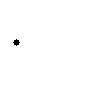

In [9]:
#gerador aleatório de quadrado, círculo ou triângulo, sempre com dimensões diferentes
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import csv
tamanho = 100     

#tamanho da área disponível
altura = tamanho
largura = tamanho

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,tamanho):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  #escolha random da figura a mostrar
  escolha=random.randint(1,3)
  if (escolha==1):
    comprimento = random.randint(0, tamanho)
    xmin = random.randint(0, tamanho - comprimento) 
    ymin=xmin 
    xmax=(xmin+comprimento)
    ymax=xmax

    #gera a forma de um quadrado
    cv2.rectangle(img,(xmin, ymin),(xmax,ymax),(0,0,0),-1)
    #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)

  elif (escolha==2):
    #define dimensões random da forma
    xcentro = random.randint(1, tamanho-1) 
    ycentro = random.randint(1, tamanho-1) 
    raio=random.randint(1,(tamanho/2))
   
    #gera a forma de um círculo
    while (raio >= (tamanho-xcentro) or raio >= (tamanho-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
      xcentro = random.randint(1, tamanho-1) 
      ycentro = random.randint(1, tamanho-1) 
      raio=random.randint(1,(tamanho/2))
    else:
      cv2.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
      #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

  else:
    #define dimensões random da forma
    xe=random.randint(0, tamanho)
    ye=random.randint(0, tamanho)
    xp=random.randint(0, tamanho)
    yp=random.randint(0, tamanho)
    xd=random.randint(0, tamanho)
    yd=random.randint(0, tamanho)

    #gera a forma de um triângulo
    while (yp >= ye or yp >= yd or xd <= xe):
      xe=random.randint(0, tamanho)
      ye=random.randint(0, tamanho)
      xp=random.randint(0, tamanho)
      yp=random.randint(0, tamanho)
      xd=random.randint(0, tamanho)
      yd=random.randint(0, tamanho)
    
    else:
      #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
      pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
      pts = pts.reshape((-1,1,2))
      cv2.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)




# 2.Crie uma rede neural que classifique imagem do tipo quadrado, circulo e triângulo.


A parte 2 está incompleta...

In [49]:
#criar dados

#gerador de quadrados com dimensões aleatórias
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import cv2 as cv
qtde=10
amostras = 10

largura = random.randint(0,amostras)
altura = largura

for index in range(0,qtde-1):
  f = open("dataset_exe1.csv", "w")
  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + "P"+str(py)+str(px)+","
  data = data + "Saida\n"
  f.write( data )

  for amostra in range(0,amostras):
    img = np.zeros([altura,largura,3])
    for py in range(0,altura):
      for px in range(0, largura):
        img[px][py][0] = 255   # cor azul
        img[px][py][1] = 255   # cor verde
        img[px][py][2] = 255   # cor vermelho

    lado = random.randint(0, altura)
    x_min = random.randint(0, largura - lado) 
    y_min = random.randint(0, altura - lado) 
    cv2.rectangle(img,(x_min, y_min),(x_min+lado,y_min+lado),(0,0,0),-1)
    #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)
  
    data = ""
    for py in range(0,altura):
      for px in range(0, largura):
        data = data + str(int(img[px][py][0]))+","
    data = data + "0\n"

    f.write( data )

  #gerador de círculos com dimensões aleatórias
  xcentro = random.randint(1, amostras-1) 
  ycentro = random.randint(1, amostras-1) 
  raio=random.randint(1,(amostras/2))

  altura = amostras
  largura = amostras

  f = open("dataset_exe1.csv", "w")
  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + "P"+str(py)+str(px)+","
  data = data + "Saida\n"
  f.write( data )

  for amostra in range(0,amostras):
    img = np.zeros([altura,largura,3])
    for py in range(0,altura):
      for px in range(0, largura):
        img[px][py][0] = 255   # cor azul
        img[px][py][1] = 255   # cor verde
        img[px][py][2] = 255   # cor vermelho

  
  while (raio >= (amostras-xcentro) or raio >= (amostras-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
    xcentro = random.randint(1, tamanho-1) 
    ycentro = random.randint(1, tamanho-1) 
    raio=random.randint(1,(tamanho/2))
  else:
    cv.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
    #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

    data = ""
    for py in range(0,altura):
      for px in range(0, largura):
        data = data + str(int(img[px][py][0]))+","
    data = data + "0\n"

    f.write( data )

  #gerado de triângulos com dimensões aleatórias
  xe=random.randint(0, amostras)
  ye=random.randint(0, amostras)
  xp=random.randint(0, amostras)
  yp=random.randint(0, amostras)
  xd=random.randint(0, amostras)
  yd=random.randint(0, amostras)

  altura = amostras
  largura = amostras

  for amostra in range(0,amostras):
    img = np.zeros([altura,largura,3])
    for py in range(0,altura):
      for px in range(0, largura):
        img[px][py][0] = 255   # cor azul
        img[px][py][1] = 255   # cor verde
        img[px][py][2] = 255   # cor vermelho

  
  while (yp >= ye or yp >= yd or xd <= xe):
    xe=random.randint(0, amostras)
    ye=random.randint(0, amostras)
    xp=random.randint(0, amostras)
    yp=random.randint(0, amostras)
    xd=random.randint(0, amostras)
    yd=random.randint(0, amostras)

  else:
    #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
    pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
    pts = pts.reshape((-1,1,2))
    cv.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

    data = ""
    for py in range(0,altura):
      for px in range(0, largura):
        data = data + str(int(img[px][py][0]))+","
    data = data + "0\n"

    f.write( data )

  f.close()



In [45]:
#leitura dos dados
import pandas as pd
dados = pd.read_csv("dataset_exe1.csv")
dados.head()

dados_entrada = dados.drop("Saida", axis=1)
dados_saida = dados["Saida"]

In [40]:
#Divisão de dados
from sklearn.model_selection import train_test_split

dados_entrada_treino,dados_entrada_teste, dados_saida_treino,dados_saida_teste = train_test_split(dados_entrada, dados_saida, test_size=0.3,random_state = 42)

In [41]:
#Normalizacao dos dados
from sklearn.preprocessing import StandardScaler
normaliza = StandardScaler()

normaliza = normaliza.fit(dados_entrada_treino)

dados_entrada_treino = normaliza.transform(dados_entrada_treino)
dados_entrada_teste = normaliza.transform(dados_entrada_teste)

In [42]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter = 500)
clf = clf.fit(dados_entrada_treino, dados_saida_treino)

#aqui deu errado...

ValueError: ignored

In [37]:
calculado = clf.predict(dados_entrada_teste)
real=dados_saida_teste.values
print("Calculado: ",calculado[0:10])
print("Saida:     ",real[0:10])

NotFittedError: ignored

In [16]:
#validação do teste
from sklearn.metrics import accuracy_score
print(accuracy_score(real,calculado))

1.0


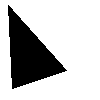

triangulo


In [48]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
import csv
tamanho = 100     

#tamanho da área disponível
altura = tamanho
largura = tamanho

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,tamanho):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  #escolha random da figura a mostrar
  escolha=random.randint(1,3)
  if (escolha==1):
    comprimento = random.randint(0, tamanho)
    xmin = random.randint(0, tamanho - comprimento) 
    ymin=xmin 
    xmax=(xmin+comprimento)
    ymax=xmax

    #gera a forma de um quadrado
    cv2.rectangle(img,(xmin, ymin),(xmax,ymax),(0,0,0),-1)
    #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)

  elif (escolha==2):
    #define dimensões random da forma
    xcentro = random.randint(1, tamanho-1) 
    ycentro = random.randint(1, tamanho-1) 
    raio=random.randint(1,(tamanho/2))
   
    #gera a forma de um círculo
    while (raio >= (tamanho-xcentro) or raio >= (tamanho-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
      xcentro = random.randint(1, tamanho-1) 
      ycentro = random.randint(1, tamanho-1) 
      raio=random.randint(1,(tamanho/2))
    else:
      cv2.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
      #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

  else:
    #define dimensões random da forma
    xe=random.randint(0, tamanho)
    ye=random.randint(0, tamanho)
    xp=random.randint(0, tamanho)
    yp=random.randint(0, tamanho)
    xd=random.randint(0, tamanho)
    yd=random.randint(0, tamanho)

    #gera a forma de um triângulo
    while (yp >= ye or yp >= yd or xd <= xe):
      xe=random.randint(0, tamanho)
      ye=random.randint(0, tamanho)
      xp=random.randint(0, tamanho)
      yp=random.randint(0, tamanho)
      xd=random.randint(0, tamanho)
      yd=random.randint(0, tamanho)
    
    else:
      #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
      pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
      pts = pts.reshape((-1,1,2))
      cv2.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)

if (escolha==1):
  print('quadrado')
elif (escolha==2):
  print('círculo')
else:
  print('triangulo')



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
amostras = 100


largura = random.randint(0,amostras)
altura = largura
tamanho = altura * largura
f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  lado = random.randint(0, altura)
  x_min = random.randint(0, largura - lado) 
  y_min = random.randint(0, altura - lado) 
  cv2.rectangle(img,(x_min, y_min),(x_min+lado,y_min+lado),(0,0,0),-1)
  #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)
  
  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)



xcentro = random.randint(1, amostras-1) 
ycentro = random.randint(1, amostras-1) 
raio=random.randint(1,(amostras/2))

altura = amostras
largura = amostras

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  
while (raio >= (amostras-xcentro) or raio >= (amostras-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
  raio=random.randint(1,(amostras/2))
else:
  cv.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
  #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

#triângulo
xe=random.randint(0, amostras)
ye=random.randint(0, amostras)
xp=random.randint(0, amostras)
yp=random.randint(0, amostras)
xd=random.randint(0, amostras)
yd=random.randint(0, amostras)

altura = amostras
largura = amostras

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  
while (yp >= ye or yp >= yd or xd <= xe):
  xe=random.randint(0, amostras)
  ye=random.randint(0, amostras)
  xp=random.randint(0, amostras)
  yp=random.randint(0, amostras)
  xd=random.randint(0, amostras)
  yd=random.randint(0, amostras)

else:
  #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
  pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)